In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import corner
import matplotlib.pyplot as plt
plt.style.use("default")
import numpy as np
from matplotlib import rcParams



In [3]:
# 需要先删除 # 号
df_without_informative_prior = pd.read_csv('without_informative_prior_posterior.dat', delim_whitespace=True)
df_with_informative_prior = pd.read_csv('with_informative_prior_posterior.dat', delim_whitespace=True)

/tmp/ipykernel_7285/2199362849.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_without_informative_prior = pd.read_csv('without_informative_prior_posterior.dat', delim_whitespace=True)
/tmp/ipykernel_7285/2199362849.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_with_informative_prior = pd.read_csv('with_informative_prior_posterior.dat', delim_whitespace=True)


In [4]:
columns_to_plot_corner = ['Mf', 'af', 'RQC_alpha']
data_corner_with_alpha_without_informative_prior = df_without_informative_prior[columns_to_plot_corner].values
data_corner_with_alpha_with_informative_prior = df_with_informative_prior[columns_to_plot_corner].values

/home/jnchen/anaconda3/lib/python3.10/site-packages/corner/core.py:795: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


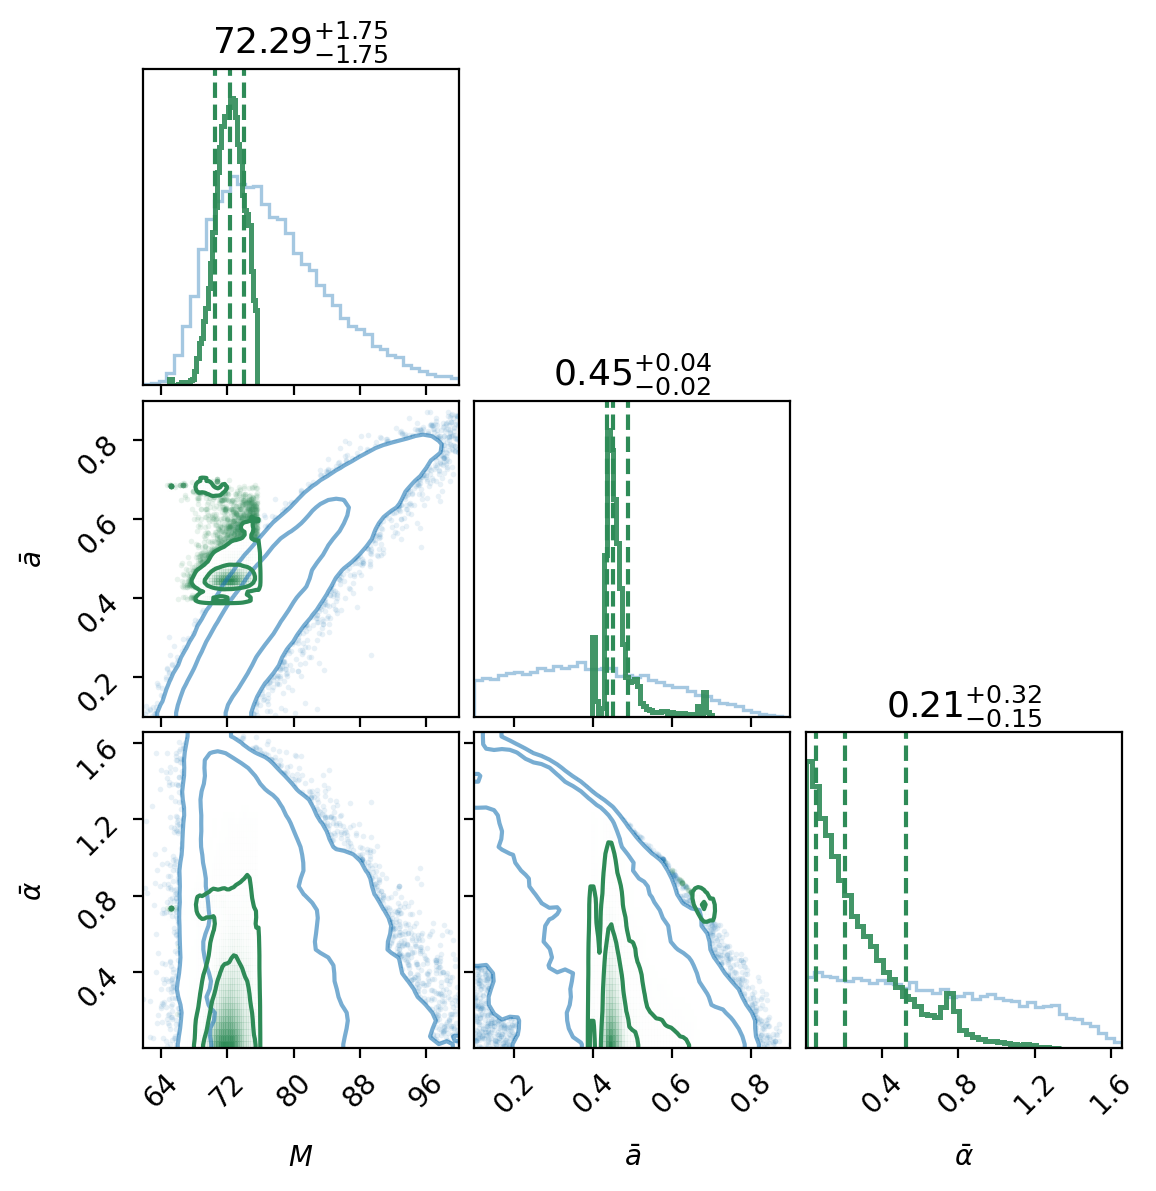

In [5]:
# 绘制 corner 图

corner_figure_with_alpha = corner.corner(
    data_corner_with_alpha_without_informative_prior,
    labels=[r"$M$", r"$\bar{a}$", r"$\bar{\alpha}$"],
    bins=40,
    show_titles=False,                 # 不显示 title
    quantiles=None,                    # 不画 quantile
    levels=(0.68, 0.95),
    smooth=1.0,
    color="tab:blue",
    plot_density=False,                # 关键：不填充
    plot_contours=True,
    hist_kwargs=dict(alpha=0.4, lw=1.2),
    contour_kwargs=dict(alpha=0.6,lw=0.5)
)

corner.corner(
    data_corner_with_alpha_with_informative_prior,
    bins=40,
    show_titles=True,
    quantiles=[0.16, 0.5, 0.84],
    levels=(0.68, 0.95),
    smooth=1.0,
    color="seagreen",
    fig=corner_figure_with_alpha,
    plot_density=True,
    hist_kwargs=dict(alpha=0.9, lw=1.8),
    contour_kwargs=dict(lw=2.0),
    title_kwargs=dict(fontsize=13),
    label_kwargs=dict(fontsize=14)
)

corner_figure_with_alpha.set_size_inches(6.5, 6.5)

corner_figure_with_alpha.set_size_inches(6, 6)
# corner_figure.suptitle("(a) GW150914", fontsize=16, y=0.01)

plt.show()

In [6]:
columns_to_plot_compared = ['Mf', 'af']
data_RQC_for_compared_without_informative_prior = df_without_informative_prior[columns_to_plot_compared].values
data_RQC_for_compared_with_informative_prior = df_with_informative_prior[columns_to_plot_compared].values

In [7]:
data_IMR_for_compared = pd.read_csv('GW150914_LAL_IMRPhenomXPHM_O2_GWOSC_Mf_af_samples.txt', delim_whitespace=True).values

/tmp/ipykernel_7285/265285787.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_IMR_for_compared = pd.read_csv('GW150914_LAL_IMRPhenomXPHM_O2_GWOSC_Mf_af_samples.txt', delim_whitespace=True).values


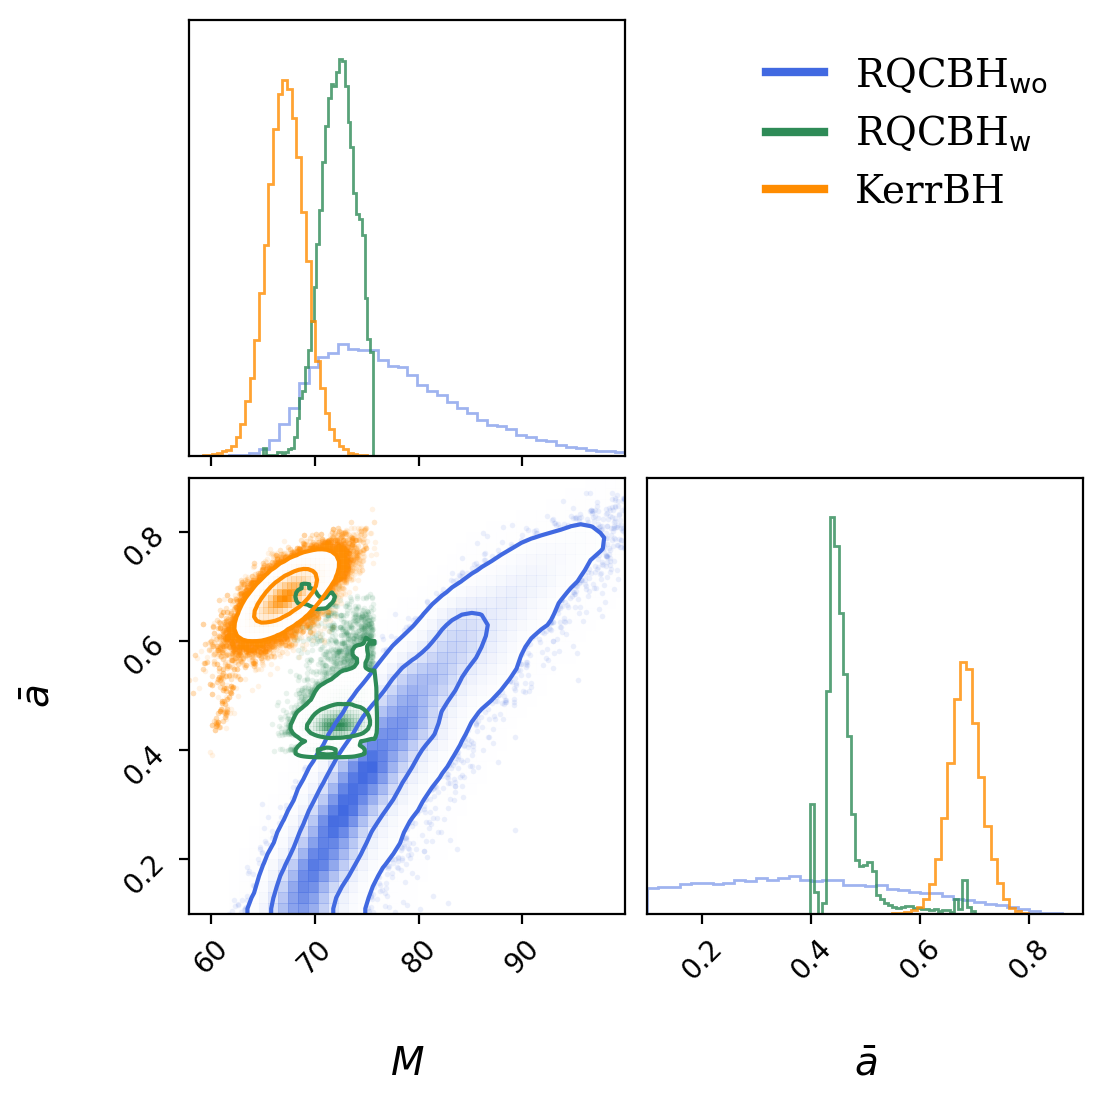

In [13]:


# ========= 第一个 corner 图 =========
compared_figure = corner.corner(
    data_RQC_for_compared_without_informative_prior,
    labels=[r"$M$", r"$\bar{a}$"],
    color="royalblue",
    bins=40,
    smooth=1.0,
    # quantiles=[0.16, 0.5, 0.84],
    # show_titles=True,
    levels=(0.68, 0.95),
    title_fmt=".3f",
    fill_contours=False,
    plot_datapoints=True,
    label_kwargs=dict(fontsize=14),
    title_kwargs=dict(fontsize=12),
    hist_kwargs=dict(density=True, alpha=0.5, color="royalblue"),
    contour_kwargs=dict(colors=["royalblue"]),
)

# ========= 第二个 corner 图（叠加） =========
corner.corner(
    data_RQC_for_compared_with_informative_prior,
    fig=compared_figure,
    color="seagreen",
    bins=40,
    smooth=1.0,
    # quantiles=[0.16, 0.5, 0.84],
    # show_titles=True,
    levels=(0.68, 0.95),
    title_fmt=".3f",
    fill_contours=False,
    plot_datapoints=True,
    label_kwargs=dict(fontsize=14),
    title_kwargs=dict(fontsize=12),
    hist_kwargs=dict(density=True, alpha=0.8, color="seagreen"),
    contour_kwargs=dict(colors=["seagreen"]),
)

# ========= 第三个 corner 图（叠加） =========
corner.corner(
    data_IMR_for_compared, 
    fig=compared_figure,                   # 指定同一个 figure！
    color="darkorange",
    bins=40,
    smooth=1.0,
    # quantiles=[0.16, 0.5, 0.84],
    levels=(0.68, 0.95),
    fill_contours=False,          # 不填充，只画线条更清晰
    plot_datapoints=True,
    label_kwargs=dict(fontsize=14),
    title_kwargs=dict(fontsize=12),
    hist_kwargs=dict(density=True, alpha=0.8, color="darkorange"),
    contour_kwargs=dict(colors=["darkorange"]),
)

axes = np.array(compared_figure.axes).reshape((2, 2))  # 对应 3 维数据 → 3x3 子图
ax = axes[0, -1]  # 右上角子图

ax.plot([], [], color="royalblue", label=r"RQCBH$_{\mathrm{wo}}$", linewidth=3)
ax.plot([], [], color="seagreen", label=r"RQCBH$_{\mathrm{w}}$", linewidth=3)
ax.plot([], [], color="darkorange", label="KerrBH", linewidth=3)

ax.legend(
    loc="upper right",
    prop={'family': 'Serif', 'size': 14},
    frameon=False,
    handlelength=1.5
)

compared_figure.set_size_inches(6, 6)


plt.show()

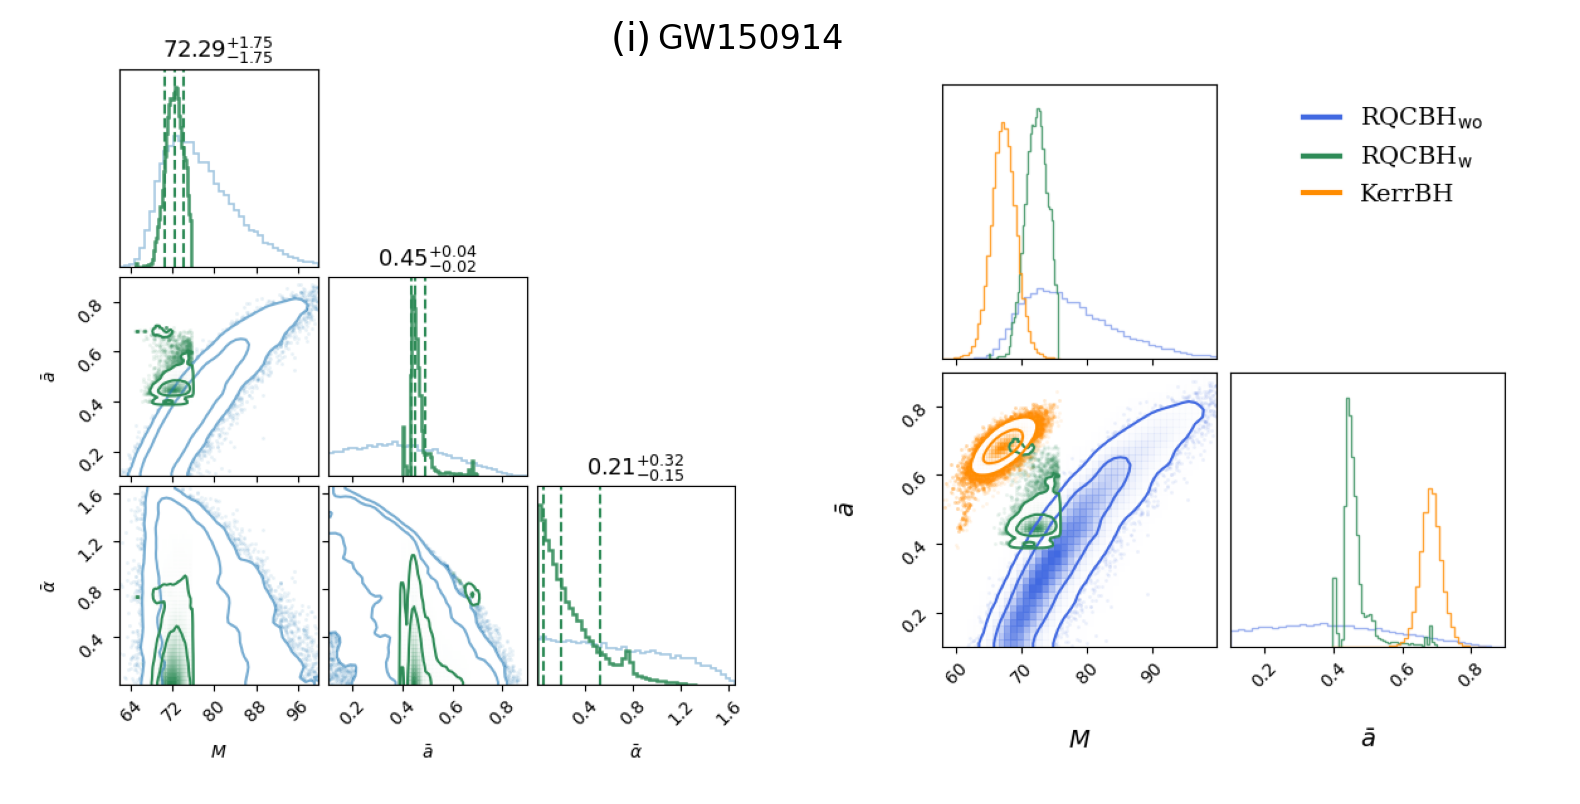

In [14]:
# 把两个 figure 转成图像
corner_figure_with_alpha.canvas.draw()
compared_figure.canvas.draw()

img1 = np.array(corner_figure_with_alpha.canvas.renderer.buffer_rgba())
img2 = np.array(compared_figure.canvas.renderer.buffer_rgba())

# 并排显示
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(img1)
axes[1].imshow(img2)

for ax in axes:
    ax.axis('off')

fig.text(
    0.4, 0.73,                 # 文字位置（x, y 坐标）
    r"$\mathrm{(i)}$",            # 内容
    fontsize=14,
    color = 'black',
    va='center', ha='center' # 对齐方式 vertical/horizontal
)

fig.text(
0.475, 0.73,                 # 文字位置（x, y 坐标）
f"GW150914",            # 内容
fontsize=12,
color = 'black',
va='center', ha='center' # 对齐方式 vertical/horizontal
)

plt.tight_layout()
plt.show()

In [15]:
fig.savefig('gw150914.pdf', dpi=300, bbox_inches='tight')